In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline

## Lecture 14 Understanding the distributions using histograms

### Review of Lecture 13 

- Learn some basic statisics 
    - probability of an event
    - probability distribution functions
    - mean, median and standard deviation
    - samples versus populations 
    - empirical versus theorectical distributions.

- Learn to calculate
    - _central tendencies_
    - _spreads_. 

- Learn about _significant figures_ and more about formatting output. 

- Learn some useful functions in **NumPy** and **SciPy** for simulating distributions and calculating statistics.

### In this lecture we will:

- learn more properties on distribution functions, especially the Normal distribution
- learn how to understand your data(distributions) using histograms
- learn a new library for statistical data visualization, **seaborn**

### 1. Properties of Normal distributions in Statistics

Notice two things: 

1) the standard deviation includes ~67% of the data (not 95%), that would be 1.97$\sigma$ (or 2-sigma, informally).  The $\pm \sigma$ bounds are the dashed lines in the above plot.  

2) the mean of our sample is generally not the same as the mean of the distribution ($\bar x \ne \mu$).  In fact, the 95% confidence bounds for the MEAN is related to the 'standard error', which is:

$s_e = \frac {s}{\sqrt N}$.


The 95% confidence bounds for the mean is given by 1.97$s_e$.  This means in practice that the mean will be more than 1.97$s_e$ away from true mean 5% of the time.    We could test that statement with another little Monte Carlo type simulation, but I leave that to student curiosity.   

### 2. Understand Your Data (distributions) with Histograms

Histograms are graphs that display the distribution of your continuous data. They are fantastic exploratory tools because they reveal properties about your sample data in ways that summary statistics cannot. For instance, while the mean and standard deviation can numerically summarize your data, histograms bring your sample data to life. 

Use histograms when you have continuous measurements and want to understand the distribution of values and look for outliers. These graphs take your continuous measurements and place them into ranges of values known as bins. Each bin has a bar that represents the count or percentage of observations that fall within that bin.

#### 2.1 Problems with single-value descriptions

In the field of statistics, we often use summary statistics to describe an entire dataset. These statistics use a single number to quantify a characteristic of the sample. For example, a measure of central tendency is a single value that represents the center point or typical value of a dataset, such as the mean. A measure of variability is another type of summary statistic that describes how spread out the values are in your dataset. The standard deviation is a conventional measure of dispersion.

These summary statistics are crucial. How often have you heard that the mean of a group is a particular value? It provides meaningful information. However, these measures are simplifications of the dataset. Graphing the data brings it to life. Generally, I find that using graphs in conjunction with statistics provides the best of both worlds!

### 2.2 The Central Tendency of a data set 

Use histograms to understand the center of the data. In the histogram below, you can see that the center is near 50. Most values in the dataset will be close to 50, and values further away are rarer. The distribution is roughly symmetric and the values fall between approximately 40 and 64.

Index(['A', 'B', 'C', 'D', 'Left Skew', 'Multimodal', 'IQ20', 'IQ100'], dtype='object')
The mean of the dataset A is 50.6
The median of the dataset A is 50.7
The standard deviation of the dataset A is 5.1


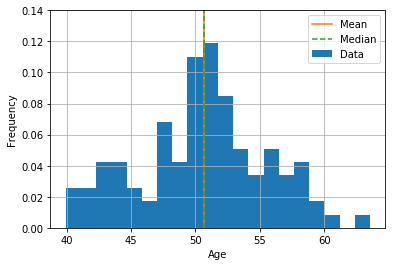

In [3]:
df = pd.read_csv('datasets/histgr.csv') # load the data set

print(df.columns) # print out the column names - understanding your data set

df['A'].hist(bins=20,density=True,label='Data') # make a histogram with 20 bins

print('The mean of the dataset A is', '%3.1f'%(df.A.mean())) # print out mean
print('The median of the dataset A is', '%3.1f'%(df.A.median())) # print out median
print('The standard deviation of the dataset A is', '%3.1f'%(df.A.std())) # print out median

plt.plot([df.A.mean(),df.A.mean()],[0,0.14],label='Mean')
plt.plot([df.A.median(),df.A.median()],[0,0.14],'--',label='Median')

plt.ylim([0,0.14])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

Test the whether the dataset is a normal distribution, p-value and skewness using the **normaltest( )** function fro the stats module of scipy: 

In [6]:
from scipy import stats

k2, p = stats.normaltest(df.A.dropna())

print('For distributon A, the p value is ', p)

if p > 0.05:
    print('Sample looks Gaussian')
else:
    print('Sample does not look Gaussian')

For distributon A, the p value is  0.8328983767345228
Sample looks Gaussian


**How to interpretation of the above Normal Test**

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

- Statistic (k2): A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
    
- p-value (p): Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
    
Each test calculates a _test-specific statistic_. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. **Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.**

The tests assume that that the sample was drawn from a Gaussian distribution. In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= 0.05: reject, distribution is not normal.
p > 0.05: fail to reject, distribution is normal.

This means that, in general, we are seeking results with a **larger p-value to confirm** that our sample was likely drawn from a Gaussian distribution.

A result above 5% _does not_ always mean that the normality (null) hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

#### Modes of groups

A difference in means shifts the distributions horizontally along the X-axis (unless the histogram is rotated). In the histograms below, one group has a mean of 50 while the other has a mean of 65.

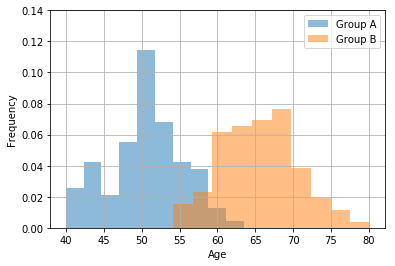

In [33]:
df = pd.read_csv('datasets/histgr.csv') # load the data set

df['A'].hist(bins=10,density=True, alpha = 0.5,label='Group A') 
df['B'].hist(bins=10,density=True, alpha = 0.5,label='Group B')

plt.ylim([0,0.14])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

#### The describe() function

In [35]:
df = pd.read_csv('datasets/histgr.csv') # load the data set
df.describe() # try the describe() function

,A,B,C,D,Left Skew,Multimodal,IQ20,IQ100
count,100.000000,100.000000,100.000000,100.000000,92.000000,200.000000,20.000000,100.000000
mean,50.632133,65.544513,50.851334,50.211539,20.107609,59.734576,102.132401,102.925179
std,5.063123,5.085469,15.342335,5.228720,7.047410,11.513170,15.550922,15.223586
min,39.935450,54.142510,15.381702,39.081231,1.000000,33.555815,78.284920,69.763146
25%,47.693309,61.819282,42.188371,46.852570,15.025000,49.592572,91.681628,92.096983
50%,50.673711,65.898797,51.654882,49.726685,21.500000,60.602041,105.608402,101.426575
75%,53.820237,68.821663,61.308291,53.196049,25.925000,69.521137,108.952938,114.041076
max,63.531483,80.184730,90.095257,71.200000,31.400000,81.929535,133.448312,138.871933


Additionally, histograms help you grasp the degree of overlap between groups. In the above histograms, there’s a relatively small amount of overlap.

### 2.3 The Variability of a data set 

Suppose you hear that two groups have the same mean of 50. It sounds like they’re practically equivalent. However, after you graph the data, the differences become apparent, as shown below:

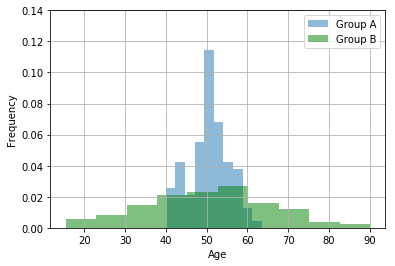

In [37]:
df['A'].hist(bins=10,density=True, alpha = 0.5,label='Group A')
df['C'].hist(bins=10,density=True, alpha = 0.5, color = 'g',label='Group C')
df.head()

plt.ylim([0,0.14])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

The histograms center on the same value of 50, but the spread of values is notably different. The values for group A mostly fall between 40 – 60 while for group B that range is 20 – 90. The mean does not tell the entire story! At a glance, the difference is evident in the histograms.

In short, histograms show you which values are more and less common along with their dispersion. You can’t gain this understanding from the raw list of values. Summary statistics, such as the mean and standard deviation, will get you partway there. But histograms make the data pop!

### 2.4 Multimodal Distributions  

A multimodal distribution has more than one peak. It’s easy to miss multimodal distributions when you focus on summary statistics, such as the mean and standard deviations. Consequently, histograms are the best method for detecting multimodal distributions.

Sometimes these multimodal distributions reflect the actual distribution of the phenomenon that you’re studying. In other words, there are genuinely different peak values in the distribution of one population. However, in other cases, multimodal distributions indicate that you’re combining subpopulations that have different characteristics. Histograms can help confirm the presence of these subpopulations and illustrate how they’re different from each other. 

For example the GDP per capita distribution is a typical multimodal distribution:

Text(0,0.5,'Frequency')

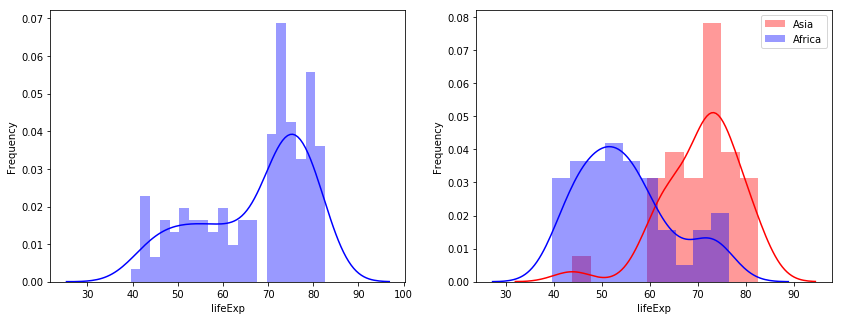

In [46]:
file = "datasets/gdp_data.txt"
gdp = pd.read_csv(file)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
gdpPC = gdp.lifeExp[(gdp.year==2007)]
sns.distplot(gdpPC,kde=True, color='blue', bins=20)
plt.ylabel('Frequency')

plt.subplot(1,2,2)
life = gdp['lifeExp'][(gdp.year==2007)&(gdp.continent=='Asia')]
sns.distplot(life,kde=True, color='red', bins=10,label='Asia')
life = gdp['lifeExp'][(gdp.year==2007)&(gdp.continent=='Africa')]
sns.distplot(life,kde=True, color='blue', bins=10,label='Africa')
plt.legend()
plt.ylabel('Frequency')

### 2.5 Skewed Distributions 

Histograms are an excellent tool for identifying the shape of your distribution. So far, we’ve been looking at symmetric distributions, such as the normal distribution. However, not all distributions are symmetrical. You might have nonnormal data that are skewed.

The shape of the distribution is a fundamental characteristic of your sample that can determine which measure of central tendency best reflects the center of your data. Relatedly, the shape also impacts your choice between using a parametric or nonparametric hypothesis test. In this manner, histograms are informative about the summary statistics and hypothesis tests that are appropriate for your data.

For skewed distributions, the direction of the skew indicates which way the longer tail extends.

For right-skewed distributions, the long tail extends to the right while most values cluster on the left, as shown below. These are real data from a biological study.

/Users/patrickwu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Right Skewed')

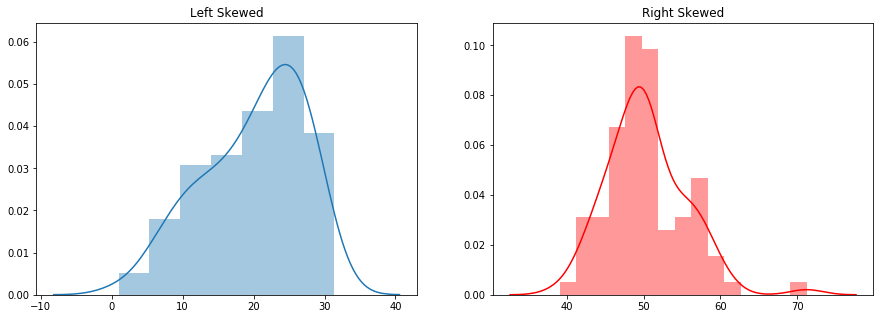

In [36]:
#sns.distplot(df['D'],kde=True, color='red', bins=15)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['Left Skew'].values[:90])
plt.title('Left Skewed')

plt.subplot(1,2,2)
sns.distplot(df['D'].values[:90],kde=True, color='red', bins=15)
plt.title('Right Skewed')
#df.D.values

In [48]:
from scipy import stats

sk = stats.skew(df['Left Skew'].dropna())
print('The skewness of data set "Left Skew" is',sk)

sk = stats.skew(df['D'].dropna())
print('The skewness of data set "Right Skew" is',sk)

The skewness of data set "Left Skew" is -0.6052306911249611
The skewness of data set "Right Skew" is 0.6527984416681031


### 2.6 Compare Distributions between Groups

To compare distributions between groups using histograms, you’ll need both a continuous variable and a categorical grouping variable. There are two common ways to display groups in histograms. You can either overlay the groups or graph them in different panels, as shown below.

- Method #1. Put all the groups in the same figure.

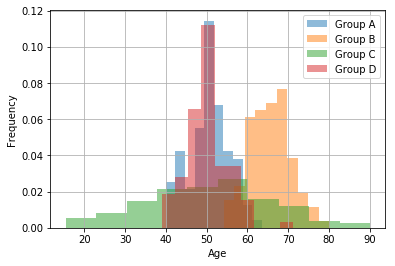

In [50]:
df = pd.read_csv('datasets/histgr.csv')

df['A'].hist(bins=10,density=True, alpha = 0.5, label='Group A')
df['B'].hist(bins=10,density=True, alpha = 0.5, label='Group B')
df['C'].hist(bins=10,density=True, alpha = 0.5, label='Group C')
df['D'].hist(bins=10,density=True, alpha = 0.5, label='Group D')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

- Method #2. Use separate panels. 

Try:

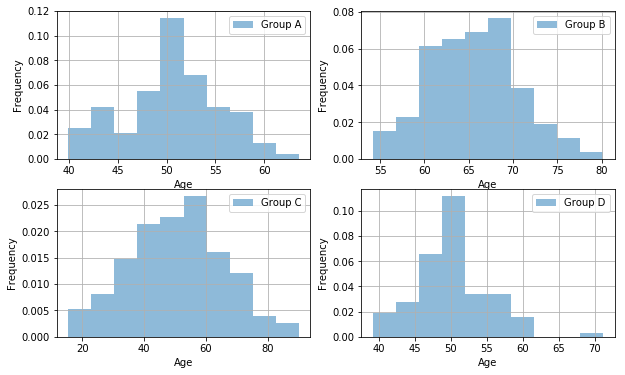

In [53]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
df['A'].hist(bins=10,density=True, alpha = 0.5,label='Group A')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2,2,2)
df['B'].hist(bins=10,density=True, alpha = 0.5,label='Group B')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2,2,3)
df['C'].hist(bins=10,density=True, alpha = 0.5,label='Group C')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2,2,4)
df['D'].hist(bins=10,density=True, alpha = 0.5,label='Group D')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

What's the problem here? Label your figures properly!

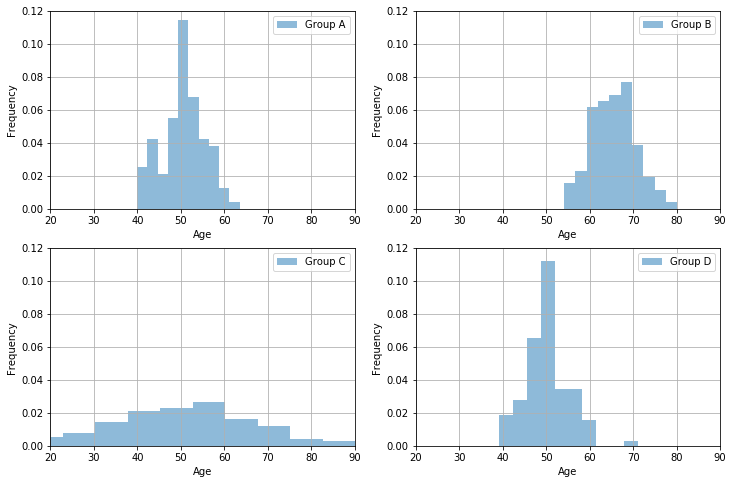

In [58]:
df = pd.read_csv('datasets/histgr.csv')

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
df['A'].hist(bins=10,density=True, alpha = 0.5,label='Group A')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([20,90])
plt.ylim([0,0.12])
plt.legend()
plt.subplot(2,2,2)
df['B'].hist(bins=10,density=True, alpha = 0.5,label='Group B')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([20,90])
plt.ylim([0,0.12])
plt.legend()
plt.subplot(2,2,3)
df['C'].hist(bins=10,density=True, alpha = 0.5,label='Group C')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([20,90])
plt.ylim([0,0.12])
plt.legend()
plt.subplot(2,2,4)
df['D'].hist(bins=10,density=True, alpha = 0.5,label='Group D')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim([20,90])
plt.ylim([0,0.12])
plt.legend()

It can be easier to compare distributions when they’re overlaid, but sometimes they get messy. Histograms in separate panels display each distribution more clearly, but the comparisons and degree of overlap aren’t quite as clear. In the examples above, the paneled distributions are clearly more legible. However, overlaid histograms can work nicely in other cases. Experiment to find the best approach for your data.

While histograms are great graph for understanding the distribution of values for a single group, they can get muddled with multiple groups. Histograms are usually pretty good for displaying **two groups**, and up to **four groups** if you display them in separate panels. If your primary goal is to compare distributions and your histograms are challenging to interpret, consider using **boxplots** or **individual plots**. Those other plots are better for comparing distributions when you have more groups. But they don’t provide quite as much detail for each distribution as histograms.

### Box plots and Strip plots 

Boxplots are one of the most common ways to visualize data distributions from multiple groups. In Python, Seaborn potting library makes it easy to make boxplots and similar plots swarmplot and stripplot. Sometimes, your data might have multiple subgroups and you might want to visualize such data using grouped boxplots.

Here, we will see examples of How to make grouped boxplots in Python. We will use **seaborn** to make the grouped boxplots. In addition to grouped boxplots, we will also see examples of related visualizations in Python, grouped stripplots (which are simply plotting the original data points with jitter and grouped swarmplot.

We will use the "gdp versus life expectancy" dataset to make boxplots

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')


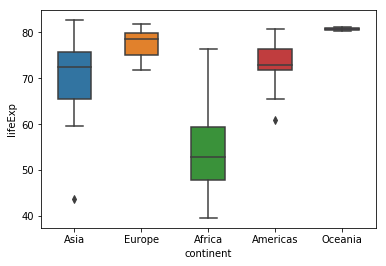

In [59]:
file = "datasets/gdp_data.txt" # file location and name
gdp = pd.read_csv(file) # load data
print(gdp.columns) # print the columns of the data frame

# make a box plot
sns.boxplot(y='lifeExp',x='continent',data = gdp[(gdp.year==2007)], width=0.5) 
plt.show()

Box plots alone are extremely useful in getting the summary of data within and between groups. Let's try to put two groups of data within one single boxplot using the isin() function to filter the data

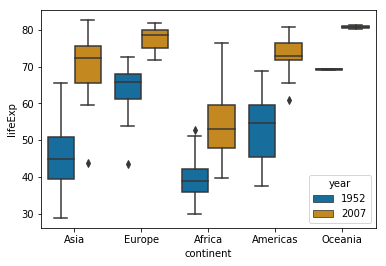

In [61]:
df1 = gdp[gdp['year'].isin([1952,2007])]

df1.head()

sns.boxplot(y='lifeExp', x='continent', 
            data=df1,
            palette="colorblind",
            hue='year')

An alternative to boxplot in Python is simply plotting the original data points with jitter using Seaborn’s stripplot. One of the biggest benefits of stripplot is we can actually see the original data and its distributions, instead of just the summary.

Let us plot the same variables using Seaborn’s stripplot function. We specify jitter=True to add random noise to lifeExp values. And to make a grouped stripplot, we specify **hue=’year’**.

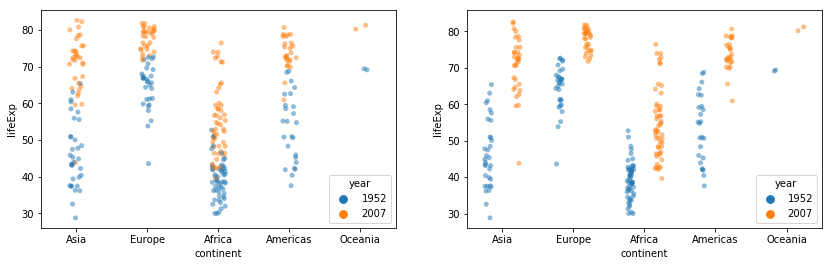

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.stripplot(y='lifeExp', x='continent', 
                    data=df1, 
                    jitter=True,
                    marker='o', 
                    alpha=0.5,
                   hue='year')

plt.subplot(1,2,2)
sns.stripplot(y='lifeExp', x='continent', 
                   data=df1, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   alpha=0.5,
                   hue='year')
plt.show()

Both the boxplot and stripplot have their own charm. Often, having boxplot with the original data makes sense and help us understand more about the data.

Luckily, it is pretty straightforward to combine boxplot with the stripplot in Python. First, we make the boxplot and then add the stripplot on it as follows.

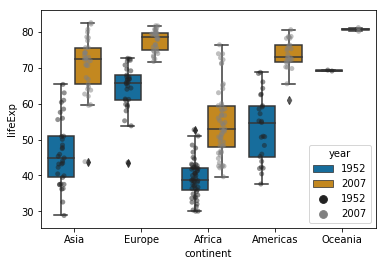

In [64]:
# make grouped boxplot
sns.boxplot(y='lifeExp', x='continent', 
                 data=df1, 
                 palette="colorblind", 
                  hue='year')

# make grouped stripplot
sns.stripplot(y='lifeExp', x='continent', 
                   data=df1, 
                   jitter=True,
                   dodge=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='year',
                   color='grey')
plt.show()

#### The predicted expectation using a Normal distribution

678.8181818181819
18.83815365310123


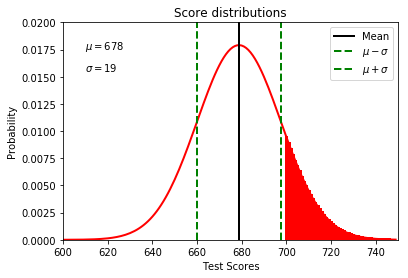

In [2]:
import numpy as np
import matplotlib.pyplot as plt

score = np.array([657, 677, 690, 634, 688, 703, 692, 665, 681, 691, 689])
print(score.mean())
print(score.std())


def Normal(x,mu,sigma):
    """
    Normal Distribution Function
    """
    Prob = (1./(sigma*np.sqrt(2.**np.pi)))*np.e**(-(x-mu)**2/(2.*sigma**2))
    return Prob

mu,sigma,incr=678.8,18.8,1 # set the mean,  standard deviation and bin width
xs=np.arange(600,750,incr) # make an array of test values
Probability=Normal(xs,mu,sigma) # get probabilities 
#plt.bar(xs,Probability,width=incr,color='lightgrey', edgecolor='k') # make the bar chart
plt.plot(xs,Probability,'r-',linewidth=2) # plot as a continuous probability distribution
plt.xlabel('Test Scores')
plt.ylabel('Probability')
plt.xlim([600,750])
plt.ylim([0,0.02])
#plt.text(5,.3,'$\mu$ = '+str(mu)) # stick on some notes
#plt.text(5,.27,'$\sigma$ ='+str(sigma))
plt.title('Score distributions');

plt.plot([score.mean(),score.mean()],[0,.02],'k-',linewidth=2,label='Mean') # plot a verticle line of mean
plt.plot([score.mean()-score.std(),score.mean()-score.std()],[0,.02],
         'g--',linewidth=2,label='$\mu-\sigma$') # plot two verticle lines of standard deviation
plt.plot([score.mean()+score.std(),score.mean()+score.std()],[0,.02],
         'g--',linewidth=2,label='$\mu+\sigma$')
plt.legend()

for x in range(700,750):
    plt.plot([x,x],[0,Normal(x,mu,sigma)],'r-',linewidth=3) # color the region of score > 700 with red

plt.text(610,0.0175,'$\mu = 678$')    
plt.text(610,0.0155,'$\sigma = 19$')      
plt.show()